# Importing Libraries

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re #Regular Expression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn.pipeline import Pipeline
import pickle

# Importing Dataset

In [134]:
original = pd.read_csv('kidney_disease.csv')
ds = pd.read_csv('kidney_disease.csv')
ds.drop('id', inplace = True, axis = 1)

In [135]:
ds.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [136]:
ds.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Refining Dataset

Some data fields have redundant/mistranslated unique values, So we'll correct these redundancies
### Removing Mistranslated Data

In [137]:
ds.replace([r'^.?yes.?$', r'^.?no.?$', '^.?notckd.?$', '^.?ckd.?$'], ['yes', 'no', 'notckd', 'ckd'], regex = True, inplace = True)

In [138]:
ds['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [139]:
ds['pcv'].replace("\t43",'43',inplace=True)
ds['pcv'].replace("\t?",None,inplace=True)
ds['pcv'] = pd.to_numeric(ds['pcv'])
ds['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [140]:
ds['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [141]:
ds['wc'].replace("\t6200",'6200',inplace=True)
ds['wc'].replace("\t8400",'8400',inplace=True)
ds['wc'].replace("\t?",None,inplace=True)
ds['wc'] = pd.to_numeric(ds['wc'])
ds['wc'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700.,
       11500.,  5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,
        5100.,  6600.])

In [142]:
ds['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [143]:
ds['rc'].replace("\t?",None,inplace=True)
ds['rc'] = pd.to_numeric(ds['rc'])
ds['rc'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1,
       5.8, 5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [144]:
ds.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Replacing null values with mode
this is a simple explaination code for the process of replacing with mode <br>
mode = ds['bp'].mode() <br>
mode[0] <br>
ds['bp'].fillna(ds['bp'].mode()[0], inplace = True)

In [145]:
def nullifier(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0], inplace = True)
nullifier(ds)

In [146]:
ds.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Encoding string data

In [147]:
le = LabelEncoder()

In [148]:
def classify(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = le.fit_transform(df[i])
classify(ds)


# Some Plots

<AxesSubplot: >

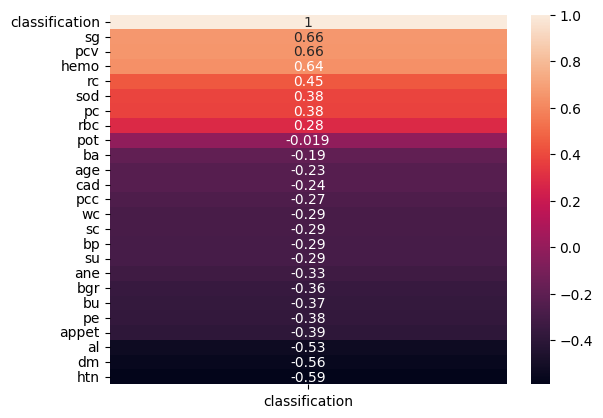

In [149]:
sns.heatmap(ds.corr()[['classification']].sort_values(by='classification', ascending=False), annot=True)

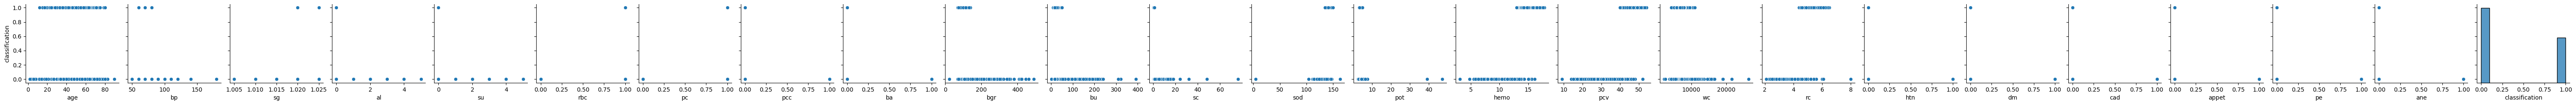

In [150]:
sns.pairplot(ds,y_vars=['classification'])

# Starting the Models training

In [151]:
x = ds.iloc[:,0:-1].values
y = ds.iloc[:,-1].values

In [152]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 43)

In [153]:
sc = StandardScaler()

In [154]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Linear Regression

In [155]:
lin_reg = LinearRegression()
lin_reg.fit(x_train ,y_train)
y_pred = lin_reg.predict(x_test)
linear_score = r2_score(y_test,y_pred)
print("Linear Accuracy:",linear_score)

Linear Accuracy: 0.6480260185716771


### Polynomial Regression

In [173]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly , y_train)
lin_reg.fit(x_poly , y_train)
y_polypredict = lin_reg.predict(poly_reg.fit_transform(x_test))
poly_score = r2_score(y_polypredict , y_test)
print("Polynomial Accuracy:",poly_score)

Polynomial Accuracy: 0.2062598602396959


### Logistic Regression

In [157]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)
y_log_pred = log_reg.predict(x_test)
log_score = r2_score(y_test, y_log_pred)
print("Logistic Accuracy:",log_score)

Logistic Accuracy: 0.9166666666666667


### Support Vector Machine(SVM)

In [158]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)
y_svm_pred = clf.predict(x_test)
svm_score = r2_score(y_test, y_svm_pred)
print("SVM Accuracy:",svm_score)

SVM Accuracy: 0.9583333333333334


### K Nearest Neighbour(KNN)

#### Testing to see optimal K

In [159]:
neighbors = list(range(1,50))
cv_scores = [ ]
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,x_train,y_train,cv = 10,scoring =
    "accuracy")
    cv_scores.append(scores.mean())
mse = [1-x for x in cv_scores] #mean square error
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 2


#### Plotting KNN Scores

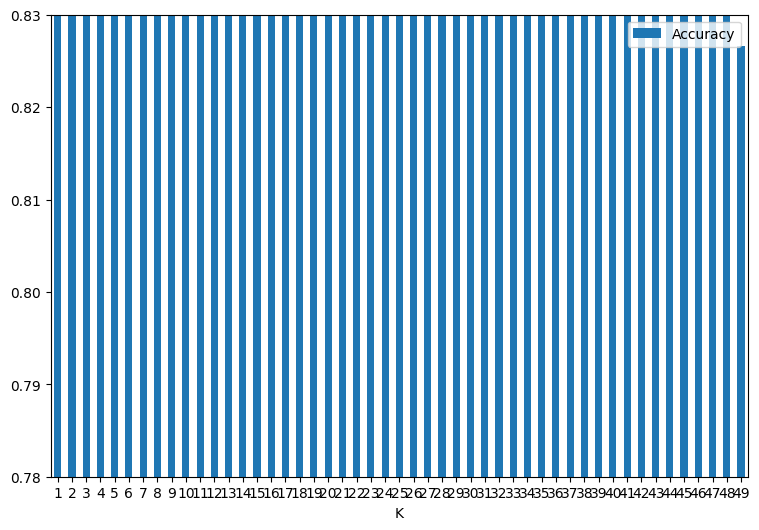

In [160]:
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,50)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.78,0.83),rot=0)
    plt.show()
plot_accuracy(cv_scores)

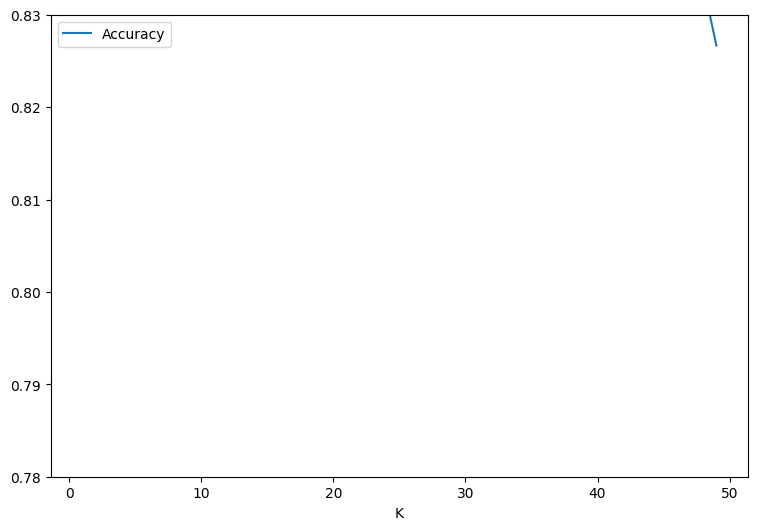

In [161]:
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,50)], "Accuracy":knn_list_scores}).set_index("K").plot(figsize= (9,6),ylim=(0.78,0.83),rot=0)
    plt.show()
plot_accuracy(cv_scores)

#### Using optimal K to train model

In [162]:
model = KNeighborsClassifier(n_neighbors=optimal_k, metric="minkowski")
model.fit(x_train, y_train)
y_knn_pred = model.predict(x_test)
knn_score = r2_score(y_test, y_knn_pred)
print("KNN score:",knn_score)

KNN score: 0.9166666666666667


# Compare the accuracy

In [171]:
titles = ['Linear Regression','Polynomial Regression(degrees = 3)','Logistic Regression','Support Vector Machine','K Nearest Neighbour(K = 2)']
data = [linear_score,poly_score,log_score,svm_score,knn_score]
print(tabulate([data],headers=titles))

  Linear Regression    Polynomial Regression(degrees = 3)    Logistic Regression    Support Vector Machine    K Nearest Neighbour(K = 2)
-------------------  ------------------------------------  ---------------------  ------------------------  ----------------------------
           0.648026                               0.20626               0.916667                  0.958333                      0.916667


# Exporting as Pickle

In [164]:
pipeline = Pipeline(steps=[('sc', sc),('classifier', clf)]) #scaler and classifier(model)

In [165]:
pickle.dump(pipeline, open('ml.pkl','wb'))